In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import minmax_scale
#from sklearn
data=pd.read_csv("C:/Users/Raghav Rastogi/Desktop/ml/Datasets/voice.csv")
data.head()
data.isnull().sum(axis=0)
x=data[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']].values
#y=data[['label']].values
y=data.iloc[:,-1]
y

x=np.c_[np.ones((x.shape[0],1)),x]
theta=np.zeros((x.shape[1],1))


In [114]:
x=minmax_scale(x,feature_range=(1,10))
y=data['label'].astype('category')
y=y.cat.codes   #first we convert the object data type to category and then chane them to codes
y=y.as_matrix() # converted the pd.series to numpy array
y
y=y[:,np.newaxis]

C:\Users\Raghav Rastogi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


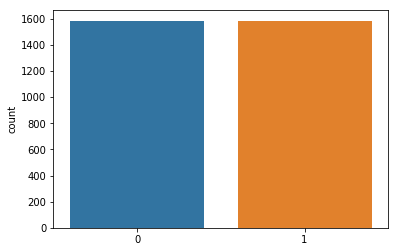

In [5]:
import seaborn as sb
sb.countplot(x=y)
# this informs that number of male is equal to female in dataset

In [52]:
male=data[y==1]
female=data[y==0]


(1584, 21)

In [75]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [98]:
#it has divided it into ranges(0.015-0.025) and made a count plot
#we can plot the histograms with bins


In [99]:
clist=data.columns

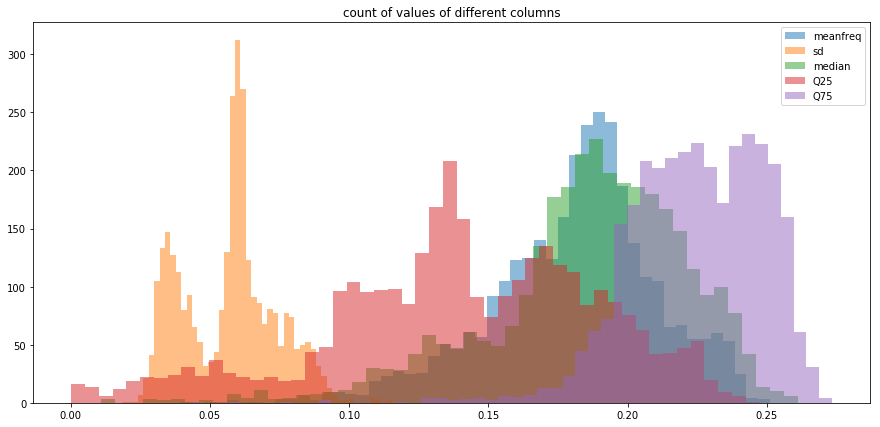

In [85]:
clist=data.columns
features=5
plt.figure(figsize=(15,7))
for i in range(features):
    plt.hist(data[clist[i]],bins=50,label=clist[i],alpha=0.5)

plt.legend(loc='best')
plt.title('count of values of different columns')
plt.show()

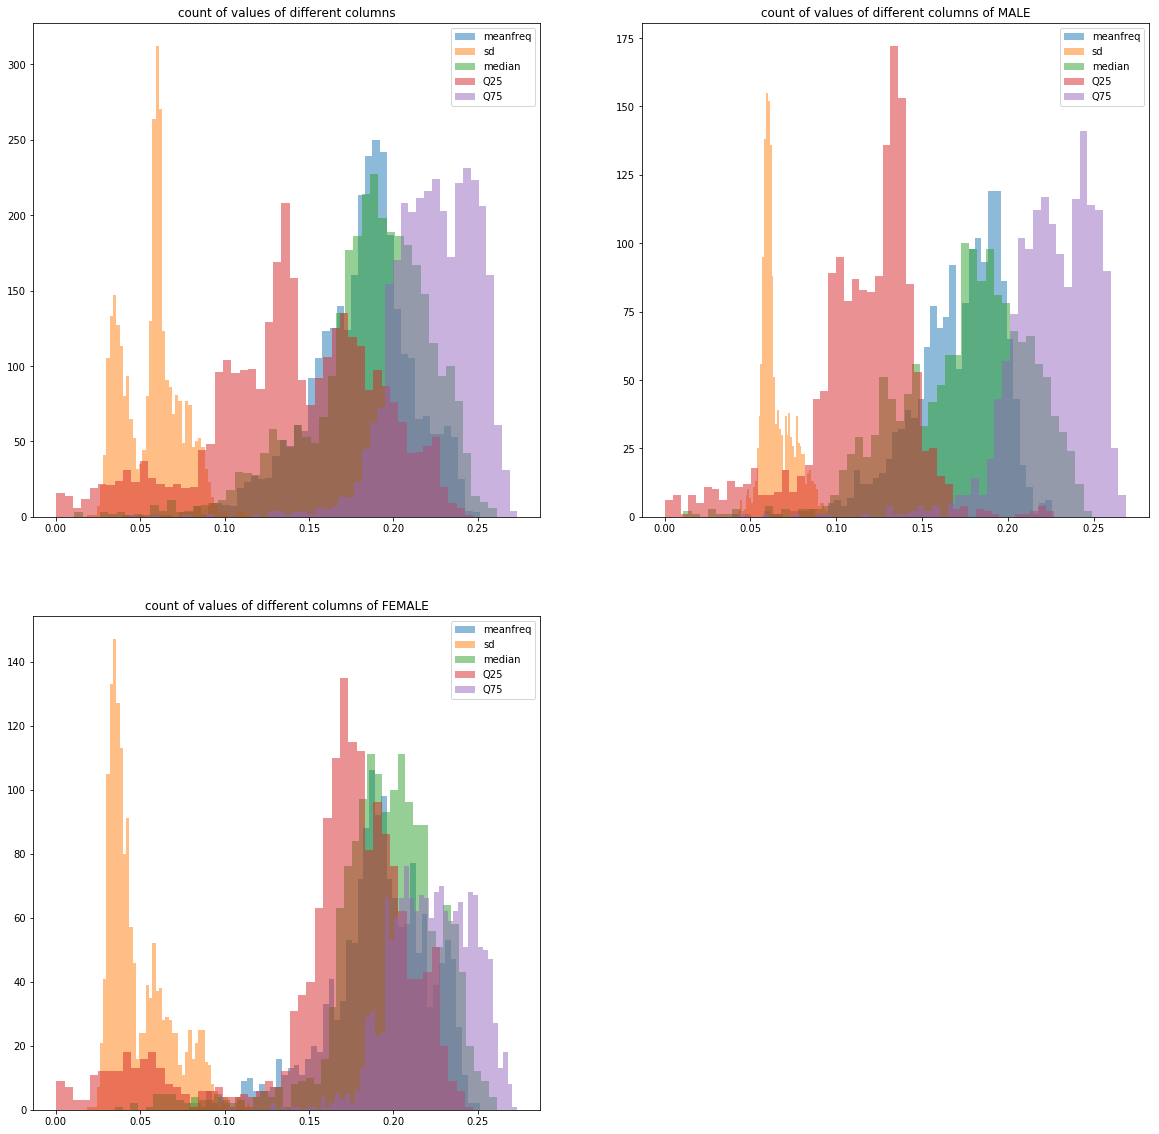

In [104]:
clist=data.columns

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
features=5


#plt.figure(figsize=(5,5))
for i in range(features):
    plt.hist(data[clist[i]],bins=50,label=clist[i],alpha=0.5)

plt.legend(loc='best')
plt.title('count of values of different columns')
#plt.show()

plt.subplot(2,2,2)
#plt.figure(figsize=(5,5))
for i in range(features):
    plt.hist(male[clist[i]],bins=50,label=clist[i],alpha=0.5)

plt.legend(loc='best')
plt.title('count of values of different columns of MALE')


plt.subplot(2,2,3)
#plt.figure(figsize=(5,5))
for i in range(features):
    plt.hist(female[clist[i]],bins=50,label=clist[i],alpha=0.5)

plt.legend(loc='best')
plt.title('count of values of different columns of FEMALE')




plt.show()



In [118]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def prod(theta,x):
    return np.dot(x,theta)

def output(theta,x):
    return sigmoid(prod(theta,x))

def cost(theta,x,y):             
    m=x.shape[0]
    tcost=-(1/m)*np.sum(y*(np.log(output(theta,x)))+(1-y)* (np.log(1-output(theta,x))))
    return tcost



def gradient(theta,x,y):
    m=x.shape[0]
    return (1/m)*np.dot(x.T,output(theta,x)-y)

def fit(x,y,theta):
    opt_weights=scipy.optimize.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y.flatten()))
    
    return opt_weights[0]




In [128]:
from sklearn.model_selection import train_test_split
import scipy

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

parameter=fit(x_train,y_train,theta)
parameter
new_theta=parameter[:,np.newaxis]
ypred=output(new_theta,x_test)
ypred=(ypred>=0.5).astype(int)
accuracy=np.mean(ypred.flatten()==y_test.flatten())
print("accuracy = ",accuracy*100,"%")

accuracy =  97.89695057833859 %


(3168, 21)